In [63]:
# Week2 Individual Assignment
# I imported data from [geohub](https://geohub.lacity.org/datasets/8f1a0d1808db44f8b3fefaaa5f456efd_0/explore?location=33.780109%2C-118.302668%2C8.73)
# , which is a data about the proportion of households without vehicles at LA county.
# I tried to analyze this data for revealing the geographical disparities of car ownership.

In [3]:
import pandas as pd
import geopandas as gpd

In [29]:
# read and add shapefile to notebook
df = gpd.read_file('data/Without_Vehicle_(census_tract).geojson')

In [30]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [31]:
# how many rows and columns?
df.shape

(2495, 11)

In [32]:
# output the original data's info
df.info

<bound method DataFrame.info of             tract  no_vehicle  no_vehicle_universe  no_vehicle_pct  \
0     06037101110         192                 1494            12.9   
1     06037101122           9                 1372             0.7   
2     06037101220          73                 1357             5.4   
3     06037101221         215                 1450            14.8   
4     06037101222         196                  935            21.0   
...           ...         ...                  ...             ...   
2490  06037980026           0                    0             NaN   
2491  06037980028           0                    0             NaN   
2492  06037980035          20                  164            12.2   
2493  06037980036           0                  106             0.0   
2494  06037980037           0                    0             NaN   

        sup_dist                                    csa                   spa  \
0     District 5                  Los Angeles 

In [33]:
# what are the columns?
df.columns.to_list()

['tract',
 'no_vehicle',
 'no_vehicle_universe',
 'no_vehicle_pct',
 'sup_dist',
 'csa',
 'spa',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [34]:
# counting value of each category
df['spa'].value_counts()

spa
SPA 2 - San Fernando       558
SPA 3 - San Gabriel        392
SPA 8 - South Bay          380
SPA 4 - Metro              352
SPA 7 - East               290
SPA 6 - South              245
SPA 5 - West               185
SPA 1 - Antelope Valley     93
Name: count, dtype: int64

In [35]:
# save it as a variable
spa_count = df['spa'].value_counts()
spa_count

spa
SPA 2 - San Fernando       558
SPA 3 - San Gabriel        392
SPA 8 - South Bay          380
SPA 4 - Metro              352
SPA 7 - East               290
SPA 6 - South              245
SPA 5 - West               185
SPA 1 - Antelope Valley     93
Name: count, dtype: int64

In [36]:
# convert the series into a dataframe
spa_count = spa_count.reset_index()
spa_count

,spa,count
0,SPA 2 - San Fernando,558
1,SPA 3 - San Gabriel,392
2,SPA 8 - South Bay,380
3,SPA 4 - Metro,352
4,SPA 7 - East,290
5,SPA 6 - South,245
6,SPA 5 - West,185
7,SPA 1 - Antelope Valley,93


In [37]:
# current columns as a list
spa_count.columns.to_list()

['spa', 'count']

In [38]:
# rename columns
spa_count.columns = ['SPA', 'COUNT']
spa_count

,SPA,COUNT
0,SPA 2 - San Fernando,558
1,SPA 3 - San Gabriel,392
2,SPA 8 - South Bay,380
3,SPA 4 - Metro,352
4,SPA 7 - East,290
5,SPA 6 - South,245
6,SPA 5 - West,185
7,SPA 1 - Antelope Valley,93


<Axes: >

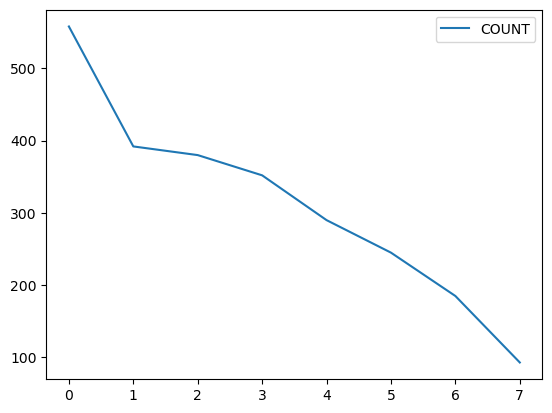

In [43]:
# plotting data of counts in each SPA
spa_count.plot()

<Axes: title={'center': 'Number of tracts per SPA'}, xlabel='SPA'>

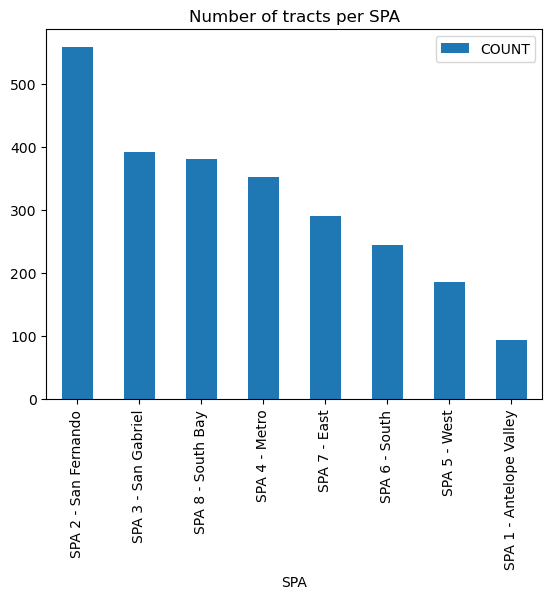

In [50]:
# shows it in a bar chart
spa_count.plot.bar (x = 'SPA', y = 'COUNT', title = 'Number of tracts per SPA')

In [39]:
# trimming ver1: show a dataframe with a subset of columns
df[['spa','no_vehicle_pct']]

,spa,no_vehicle_pct
0,SPA 2 - San Fernando,12.9
1,SPA 2 - San Fernando,0.7
2,SPA 2 - San Fernando,5.4
3,SPA 2 - San Fernando,14.8
4,SPA 2 - San Fernando,21.0
...,...,...
2490,SPA 2 - San Fernando,NaN
2491,SPA 5 - West,NaN
2492,SPA 3 - San Gabriel,12.2
2493,SPA 3 - San Gabriel,0.0


In [40]:
# trimming ver2: show a dataframe with a subset of columns
desired_columns = ['spa','no_vehicle_pct']

# subset based on desired columns
df[desired_columns].sample(5)

,spa,no_vehicle_pct
821,SPA 6 - South,18.3
938,SPA 5 - West,1.9
1209,SPA 3 - San Gabriel,1.6
1692,SPA 7 - East,15.6
2376,SPA 1 - Antelope Valley,2.3


In [41]:
# saving new dataframe of desired columns
df_trimmed = df[desired_columns].copy()
df_trimmed

,spa,no_vehicle_pct
0,SPA 2 - San Fernando,12.9
1,SPA 2 - San Fernando,0.7
2,SPA 2 - San Fernando,5.4
3,SPA 2 - San Fernando,14.8
4,SPA 2 - San Fernando,21.0
...,...,...
2490,SPA 2 - San Fernando,NaN
2491,SPA 5 - West,NaN
2492,SPA 3 - San Gabriel,12.2
2493,SPA 3 - San Gabriel,0.0


In [42]:
# filtering data
df_trimmed[df_trimmed.spa == 'SPA 2 - San Fernando']

,spa,no_vehicle_pct
0,SPA 2 - San Fernando,12.9
1,SPA 2 - San Fernando,0.7
2,SPA 2 - San Fernando,5.4
3,SPA 2 - San Fernando,14.8
4,SPA 2 - San Fernando,21.0
...,...,...
2485,SPA 2 - San Fernando,NaN
2486,SPA 2 - San Fernando,0.0
2487,SPA 2 - San Fernando,NaN
2488,SPA 2 - San Fernando,6.1


In [48]:
# save "percentage of no vehicle" as a variable
no_vehicle_pct = df['no_vehicle_pct']
no_vehicle_pct = no_vehicle_pct.reset_index()
no_vehicle_pct

,index,no_vehicle_pct
0,0,12.9
1,1,0.7
2,2,5.4
3,3,14.8
4,4,21.0
...,...,...
2490,2490,NaN
2491,2491,NaN
2492,2492,12.2
2493,2493,0.0


In [49]:
# shows the first 5 rows of the dataframe 
no_vehicle_pct.head()

,index,no_vehicle_pct
0,0,12.9
1,1,0.7
2,2,5.4
3,3,14.8
4,4,21.0


In [52]:
# number of tracts
len(no_vehicle_pct)

2495

In [58]:
no_vehicle_pct.replace('NaN', '0')
no_vehicle_pct

,index,no_vehicle_pct
0,0,12.9
1,1,0.7
2,2,5.4
3,3,14.8
4,4,21.0
...,...,...
2490,2490,NaN
2491,2491,NaN
2492,2492,12.2
2493,2493,0.0


In [64]:
# though I tried to calculate the mean percentage of households without vehicles, 
# I gave up with it. One of the challenges is how to deal with lacked data 
# as it is categorized as strings. 